In [1]:
using GLM
using DataFrames
using Plots

In [2]:
f(x) = 3x + 5
data = [([x + rand(Float64)], f(x) + rand(Float64)) for x in -3:0.1:3]
df = DataFrame(x = [d[1][1] for d in data], y = [d[2] for d in data])

Row,x,y
,Float64,Float64
1,-2.17378,-3.59058
2,-2.33903,-3.12652
3,-2.17086,-2.85453
4,-2.02043,-2.36307
5,-2.31693,-2.54611
6,-2.0198,-2.4622
7,-2.32801,-1.59931
8,-2.16939,-0.978025
9,-1.76115,-1.26527


In [3]:
model = lm(@formula(y ~ x), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  4.17995   0.124406   33.60    <1e-39    3.93101    4.42888
x            2.93514   0.0675574  43.45    <1e-45    2.79996    3.07032
───────────────────────────────────────────────────────────────────────

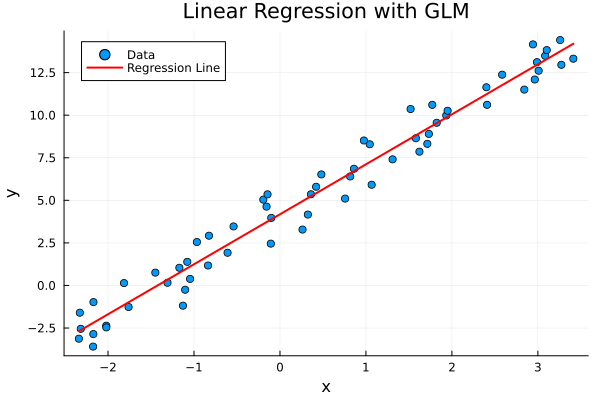

In [4]:
# 回帰直線の予測
x_range = range(minimum(df.x), maximum(df.x), length=100)
y_pred = predict(model, DataFrame(x = x_range))

# プロット
scatter(df.x, df.y, label="Data", xlabel="x", ylabel="y", title="Linear Regression with GLM")
plot!(x_range, y_pred, label="Regression Line", lw=2, color=:red)

In [5]:
coef(model)

2-element Vector{Float64}:
 4.179948916344101
 2.9351384655478414